# 机器学习——06逻辑回归

## 参考资料

1. [AIlearning](https://ailearning.apachecn.org/#/docs/ml/2)
2. [Machine-Learning-in-Action](https://github.com/TeFuirnever/Machine-Learning-in-Action)
3. 机器学习实战（美）哈林顿(Harrington,P.)著；李锐等译.-北京：人民邮电出版社，2013.6
4. 庞善民.西安交通大学机器学习导论2022春PPT
5. [CART决策树算法的Python实现](https://blog.csdn.net/qq_45717425/article/details/120992980)

线性回归包含了一些强大的方法，但这些方法创建的模型需要拟合所有的样本点（局部加权线性回归除外)。当数据拥有众多特征并且特征之间关系十分复杂时，构建全局模型的想法就显得太难了，也略显笨拙。而且，实际生活中很多问题都是非线性的，不可能使用全局线性模型来拟合任何数据。

一种可行的方法是将数据集切分成很多份易建模的数据，然后利用线性回归技术来建模。如果首次切分后仍然难以拟合线性模型就继续切分。在这种切分方式下，树结构和回归法就相当有用。

引入一个新的叫做 `CART(Classification And Regression Trees, 分类回归树)` 的树构建算法。该算法既可以用于分类还可以用于回归。

## 一、树回归原理

### 概述

为成功构建以分段常数为叶节点的树，需要度量出数据的一致性。第3章使用树进行分类，会在给定节点时计算数据的混乱度。那么如何计算连续型数值的混乱度呢？

在这里，计算连续型数值的混乱度是非常简单的。首先计算所有数据的均值，然后计算每条数据的值到均值的差值。为了对正负差值同等看待，一般使用绝对值或平方值来代替上述差值。

上述做法有点类似于前面介绍过的统计学中常用的方差计算。唯一不同就是，方差是平方误差的均值(均方差)，而这里需要的是平方误差的总值(总方差)。总方差可以通过均方差乘以数据集中样本点的个数来得到。

### 树构建算法比较

之前的决策树中使用的树构建算法是 ID3 。ID3 的做法是每次选取当前最佳的特征来分割数据，并按照该特征的所有可能取值来切分。也就是说，如果一个特征有 4 种取值，那么数据将被切分成 4 份。一旦按照某特征切分后，该特征在之后的算法执行过程中将不会再起作用，所以有观点认为这种切分方式过于迅速。另外一种方法是二元切分法，即每次把数据集切分成两份。如果数据的某特征值等于切分所要求的值，那么这些数据就进入树的左子树，反之则进入树的右子树。

除了切分过于迅速外， ID3 算法还存在另一个问题，它不能直接处理连续型特征。只有事先将连续型特征转换成离散型，才能在 ID3 算法中使用。但这种转换过程会破坏连续型变量的内在性质。而使用二元切分法则易于对树构造过程进行调整以处理连续型特征。具体的处理方法是: 如果特征值大于给定值就走左子树，否则就走右子树。另外，二元切分法也节省了树的构建时间，但这点意义也不是特别大，因为这些树构建一般是离线完成，时间并非需要重点关注的因素。

CART 是十分著名且广泛记载的树构建算法，它使用二元切分来处理连续型变量。对 CART 稍作修改就可以处理回归问题。第 3 章中使用香农熵来度量集合的无组织程度。如果选用其他方法来代替香农熵，就可以使用树构建算法来完成回归。

回归树与分类树的思路类似，但是叶节点的数据类型不是离散型，而是连续型。

而决策树的三种常用构建算法的比较如下：

| 算法 | 支持模型   | 树结构 | 特征选择   | 连续值处理 | 缺失值处理 | 剪枝   |
| ---- | ---------- | ------ | ---------- | ---------- | ---------- | ------ |
| ID3  | 分类       | 多叉树 | 信息增益   | 不支持     | 不支持     | 不支持 |
| C4.5 | 分类       | 多叉树 | 信息增益率 | 支持       | 支持       | 支持   |
| CART | 分类，回归 | 二叉树 | 基尼指数   | 支持       | 支持       | 支持   |



### 树回归开发流程

(1) 收集数据: 采用任意方法收集数据。

(2) 准备数据: 需要数值型数据，标称型数据应该映射成二值型数据。

(3) 分析数据: 绘出数据的二维可视化显示结果，以字典方式生成树。

(4) 训练算法: 大部分时间都花费在叶节点树模型的构建上。

(5) 测试算法: 使用测试数据上的R^2值来分析模型的效果。

(6) 使用算法: 使用训练处的树做预测，预测结果还可以用来做很多事情。

### 算法特点

优点: 可以对复杂和非线性的数据建模。

缺点: 结果不易理解。在做特征选择的时候都是选择最优的一个特征来做分类决策，但是大多数，分类决策不应该是由某一个特征决定的，而是应该由一组特征决定的。这样决策得到的决策树更加准确。如果样本发生一点点的改动，就会导致树结构的剧烈改变。这个可以通过集成学习里面的随机森林之类的方法解决。

适用数据类型: 数值型和标称型数据。


## 二、回归树项目案例

### 项目概述

在简单数据集上生成一棵回归树。

### 开发流程

1. 收集数据: 采用任意方法收集数据

2. 准备数据: 需要数值型数据，标称型数据应该映射成二值型数据

3. 分析数据: 绘出数据的二维可视化显示结果，以字典方式生成树

4. 训练算法: 大部分时间都花费在叶节点树模型的构建上

5. 测试算法: 使用测试数据上的R^2值来分析模型的效果

6. 使用算法: 使用训练出的树做预测，预测结果还可以用来做很多事情


### 收集数据

data1.txt 文件中存储的数据格式如下:

```
0.036098    0.155096
0.993349    1.077553
0.530897    0.893462
0.712386    0.564858
0.343554    -0.371700
0.098016    -0.332760
```

### 准备数据



载入数据的函数如下：

In [4]:
from numpy import *

def loadData(fileName):
    """解析每一行，并转化为float类型

    Args:
        fileName: 文件名

    Returns:
        data: 每一行的数据集为array类型
    """
    # 假定最后一列是结果值
    data = []
    with open(fileName) as f:
        for line in f.readlines():
            currentLine = line.strip().split('\t')
            # map将currentLine中的每一个元素应用于float，返回一个列表
            floatLine = list(map(float, currentLine))
            data.append(floatLine)
    return data
data = loadData('data/data1.txt')
print(data)

[[0.036098, 0.155096], [0.993349, 1.077553], [0.530897, 0.893462], [0.712386, 0.564858], [0.343554, -0.3717], [0.098016, -0.33276], [0.691115, 0.834391], [0.091358, 0.099935], [0.727098, 1.000567], [0.951949, 0.945255], [0.768596, 0.760219], [0.541314, 0.893748], [0.146366, 0.034283], [0.673195, 0.915077], [0.18351, 0.184843], [0.339563, 0.206783], [0.517921, 1.493586], [0.703755, 1.101678], [0.008307, 0.069976], [0.243909, -0.029467], [0.306964, -0.177321], [0.036492, 0.408155], [0.295511, 0.002882], [0.837522, 1.229373], [0.202054, -0.087744], [0.919384, 1.029889], [0.377201, -0.24355], [0.814825, 1.095206], [0.61127, 0.982036], [0.072243, -0.420983], [0.41023, 0.331722], [0.869077, 1.114825], [0.620599, 1.334421], [0.101149, 0.068834], [0.820802, 1.325907], [0.520044, 0.961983], [0.48813, -0.097791], [0.819823, 0.835264], [0.975022, 0.673579], [0.953112, 1.06469], [0.475976, -0.163707], [0.273147, -0.455219], [0.804586, 0.924033], [0.074795, -0.349692], [0.625336, 0.623696], [0.6562

### 分析数据

使用plot将数据可视化


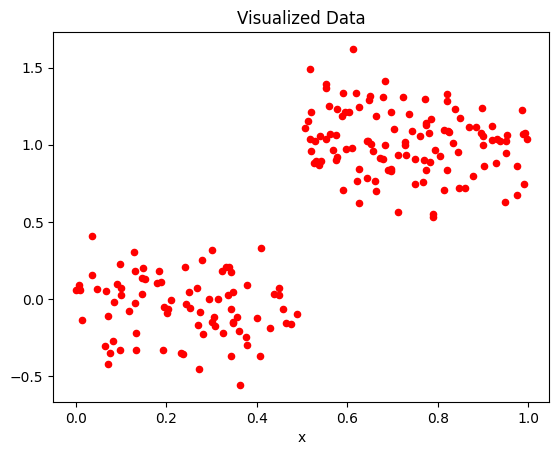

In [5]:
import matplotlib.pyplot as plt

def plotData(data):
    """  
    绘制数据集
    """
    xcord = []
    ycord = []  # 样本点
    for i in range(len(data)):
        xcord.append(data[i][0])
        ycord.append(data[i][1])  # 样本点
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord, ycord, s = 20, c = 'red', label = 'data')
    plt.title('Visualized Data')
    plt.xlabel('x')
    plt.show()

plotData(data)

### 训练算法

在树的构建过程中，需要解决多种类型数据的存储问题。将使用一部字典来存储树的数据结构，该字典将包含以下4个元素。

+ 待切分的特征。
+ 待切分的特征值。
+ 右子树。当不再需要切分的时候，也可以是单个值。
+ 左子树。与右子树类似。

之前的回归树用一部字典来存储每个切分，但该字典可以包含两个或两个以上的值。而CART算法只做二元切分，所以这里可以固定树的数据结构。树包含左键和右键，可以存储另一棵子树或者单个值。

如下的函数可以将数据进行二元切分

In [6]:
def binSplitData(dataMat, feature, value):
    """在给定特征和特征值的情况下，该函数通过数组过滤方式将
    上述数据集合切分得到两个子集并返回。

    Args:
        dataMat (矩阵): 矩阵化的数据
        feature (特征索引): 待切分的特征
        value (数值): 特征的某个值

    Returns:
        mat0: 小于等于 value 的数据集在左边
        mat1: 大于 value 的数据集在右边
    """    
    # nonzero()[0]: 返回满足条件的行索引
    mat0 = dataMat[nonzero(dataMat[:,feature] > value)[0],:]
    mat1 = dataMat[nonzero(dataMat[:,feature] <= value)[0],:]
    return mat0, mat1

testMat = mat(eye(4))
print("testMat：\n", testMat)
mat0, mat1 = binSplitData(testMat, 1, 0.5)
print("mat0：\n", mat0)
print("mat1：\n", mat1)

testMat：
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
mat0：
 [[0. 1. 0. 0.]]
mat1：
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


将构建两种树：第一种是回归树（regression tree），其每个叶节点包含单个值；第二种模型树（model tree），其每个叶节点包含一个线性方程。创建这两种树时，我们将尽量使得代码之间可以重用。

函数 `createTree()` 的伪代码大致如下：

```python

找到最佳的待切分特征：

  如果该节点不能再分，将该节点存为叶节点

  执行二元切分

  在右子树调用 createTree() 方法

  在左子树调用 createTree() 方法

```

实现`createTree()`函数之前首先要实现 chooseBestSplit() 函数。给定某个误差计算方法，该函数会找到数据集上最佳的二元切分方式。另外，该函数还要确定什么时候停止切分，一旦停止切分会生成一个叶节点。因此，函数 `chooseBestSplit()` 只需完成两件事：用最佳方式切分数据集和生成相应的叶节点。

伪代码如下：
```python
对每个特征：
    对每个特征值：
        将数据集切分成两份
        计算切分的误差
        如果当前误差小于当前最小误差，那么将当前切分设定为最佳切分并更新最小误差
返回最佳切分的特征和阈值
```

In [7]:
def regLeaf(data):
    """  
    返回每一个叶子结点的均值
    regLeaf 是产生叶节点的函数，就是求均值，即用聚类中心点来代表这类数据
    """
    return mean(data[:, -1])


def regErr(data):
    """  
    计算总方差=方差*样本数
    求这组数据的方差，即通过决策树划分，可以让靠近的数据分到同一类中去
    """
    return var(data[:, -1]) * shape(data)[0]

def chooseBestSplit(dataMat, leafType=regLeaf, errType=regErr, ops=(1, 4)):
    """用最佳方式切分数据集 和 生成相应的叶节点

    Args:
        dataMat (矩阵): 矩阵化的数据集
        leafType (函数, optional): 建立叶子点的函数. Defaults to regLeaf.
        errType (函数, optional):误差计算函数(求总方差). Defaults to regErr.
        ops (tuple, optional): [容许误差下降值，切分的最少样本数]。. Defaults to (1, 4).

    Returns:
        bestIndex: feature的index坐标
        bestValue: 切分的最优值
    """
    tolS = ops[0]  # 最小误差下降值，划分后的误差减小小于这个差值，就不用继续划分
    tolN = ops[1]  # 划分最小size

    if len(set(dataMat[:, -1].T.tolist()[0])) == 1:
        # 如果集合size为1，也就是说全部的数据都是同一个类别，不用继续划分。
        return None, leafType(dataMat)

    m, n = shape(dataMat)
    # 无分类误差的总方差和
    S = errType(dataMat)
    bestS, bestIndex, bestValue = inf, 0, 0
    # 循环处理每一列对应的feature值
    for featIndex in range(n - 1):
        for splitVal in set(dataMat[:, featIndex].T.tolist()[0]):
            # 对该列进行分组，然后组内的成员的val值进行 二元切分
            mat0, mat1 = binSplitData(dataMat, featIndex, splitVal)
            # 判断二元切分的方式的元素数量是否符合预期
            # 小于划分最小size
            if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN):
                continue
            newS = errType(mat0) + errType(mat1)
            # 如果二元切分，算出来的误差在可接受范围内，那么就记录切分点，并记录最小误差
            # 如果划分后误差小于 bestS，则说明找到了新的bestS
            if newS < bestS:
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
    # 判断二元切分的方式的元素误差是否符合预期
    # 如果减少量(S-bestS)小于阈值，则不做分割。
    if (S - bestS) < tolS:
        return None, leafType(dataMat) 
    #根据最佳的切分特征和特征值切分数据集合               
    mat0, mat1 = binSplitData(dataMat, bestIndex, bestValue)
    # 对整体的成员进行判断，是否符合预期
    # 如果集合的 size 小于 tolN 
    if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN): 
        # 当最佳划分后，集合过小，也不划分，产生叶节点
        return None, leafType(dataMat)
    return bestIndex, bestValue

dataMat1 = mat(loadData('data/data1.txt'))
feat, val = chooseBestSplit(dataMat1)
print(feat)
print(val)


0
0.48813


可以看到，最佳切分特征为第1列特征，最佳切分特征值为0.48813

接下来构造回归树。

函数 `createTree()` 的伪代码大致如下：

```python

找到最佳的待切分特征：

  如果该节点不能再分，将该节点存为叶节点

  执行二元切分

  在右子树调用 createTree() 方法

  在左子树调用 createTree() 方法

```

In [8]:
def createTree(dataMat, leafType=regLeaf, errType=regErr, ops=(1, 4)):
    """createTree(获取回归树)
    Args:
        dataMat      加载的矩阵数据
        leafType     建立叶子点的函数
        errType      误差计算函数
        ops=(1, 4)   [容许误差下降值，切分的最少样本数]
    Returns:
        retTree    决策树最后的结果
    """
    # 选择最好的切分方式:  feature索引值，最优切分值
    # choose the best split
    feat, val = chooseBestSplit(dataMat, leafType, errType, ops)
    # 如果 splitting 达到一个停止条件，那么返回 val
    if feat is None:
        return val
    retTree = {}
    retTree['splitIndex'] = feat
    retTree['splitValue'] = val
    # 大于在右边，小于在左边，分为2个数据集
    lSet, rSet = binSplitData(dataMat, feat, val)
    # 递归的进行调用，在左右子树中继续递归生成树
    retTree['left'] = createTree(lSet, leafType, errType, ops)
    retTree['right'] = createTree(rSet, leafType, errType, ops)
    return retTree

createTree(dataMat1)

{'splitIndex': 0,
 'splitValue': 0.48813,
 'left': 1.0180967672413792,
 'right': -0.04465028571428572}

这棵树只有两个叶结点。

换一个复杂一点的数据集，分段常数数据集。

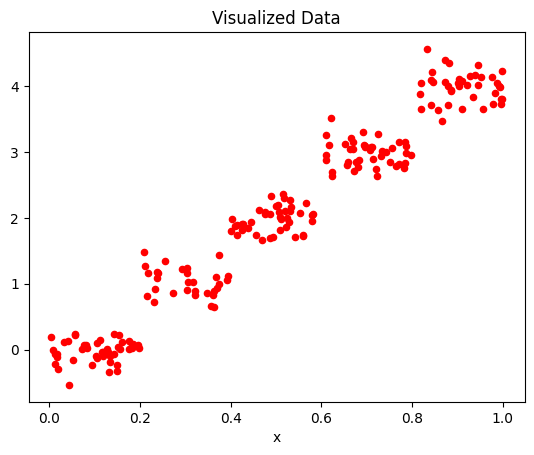

In [9]:
def plotData2(data):
    """  
    绘制数据集
    """
    xcord = []
    ycord = []  # 样本点
    for i in range(len(data)):
        xcord.append(data[i][1])
        ycord.append(data[i][2])  # 样本点
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord, ycord, s = 20, c = 'red', label = 'data')
    plt.title('Visualized Data')
    plt.xlabel('x')
    plt.show()
data2 = loadData('data/data2.txt')
plotData2(data2)

In [10]:
dataMat2  =mat(data2)
createTree(dataMat2)

{'splitIndex': 1,
 'splitValue': 0.39435,
 'left': {'splitIndex': 1,
  'splitValue': 0.582002,
  'left': {'splitIndex': 1,
   'splitValue': 0.797583,
   'left': 3.9871632,
   'right': 2.9836209534883724},
  'right': 1.980035071428571},
 'right': {'splitIndex': 1,
  'splitValue': 0.197834,
  'left': 1.0289583666666666,
  'right': -0.023838155555555553}}

可以看到，该树的结构中包含5个叶结点。

## 三、树剪枝

一棵树如果节点过多，表明该模型可能对数据进行了 “过拟合”。

通过降低决策树的复杂度来避免过拟合的过程称为 `剪枝（pruning）`。在函数 `chooseBestSplit()` 中提前终止条件，实际上是在进行一种所谓的 `预剪枝（prepruning）`操作。另一个形式的剪枝需要使用测试集和训练集，称作 `后剪枝（postpruning）`。

### 预剪枝

顾名思义，预剪枝就是及早的停止树增长，在构造决策树的同时进行剪枝。

树构建算法其实对输入的参数 tolS 和 tolN 非常敏感，如果使用其他值将不太容易达到这么好的效果

In [11]:
createTree(dataMat1, ops=(0,1))

{'splitIndex': 0,
 'splitValue': 0.48813,
 'left': {'splitIndex': 0,
  'splitValue': 0.620599,
  'left': {'splitIndex': 0,
   'splitValue': 0.625336,
   'left': {'splitIndex': 0,
    'splitValue': 0.625791,
    'left': {'splitIndex': 0,
     'splitValue': 0.643601,
     'left': {'splitIndex': 0,
      'splitValue': 0.651376,
      'left': {'splitIndex': 0,
       'splitValue': 0.6632,
       'left': {'splitIndex': 0,
        'splitValue': 0.683921,
        'left': {'splitIndex': 0,
         'splitValue': 0.819823,
         'left': {'splitIndex': 0,
          'splitValue': 0.837522,
          'left': {'splitIndex': 0,
           'splitValue': 0.846455,
           'left': {'splitIndex': 0,
            'splitValue': 0.919384,
            'left': {'splitIndex': 0,
             'splitValue': 0.976414,
             'left': {'splitIndex': 0,
              'splitValue': 0.985425,
              'left': {'splitIndex': 0,
               'splitValue': 0.989888,
               'left': {'splitIndex'

与只包含两个节点的树相比，这里构建的树过于臃肿，它甚至为数据集中每个样本都分配了一个叶节点。

通过不断修改停止条件来得到合理结果并不是很好的办法。事实上，我们常常甚至不确
定到底需要寻找什么样的结果。预剪枝这种方法实际中的效果并不好。

### 后剪枝

使用后剪枝方法需要将数据集分成测试集和训练集。首先指定参数，使得构建出的树足够大、足够复杂，便于剪枝。接下来从上而下找到叶节点，用测试集来判断将这些叶节点合并是否能降低测试误差。如果是的话就合并。

合并也被称作 `塌陷处理` ，在回归树中一般采用取需要合并的所有子树的平均值。后剪枝是目前最普遍的做法。

函数 prune() 的伪代码如下：

```python
基于已有的树切分测试数据：
    如果存在任一子集是一棵树，则在该子集递归剪枝过程
    计算将当前两个叶节点合并后的误差
    计算不合并的误差
    如果合并会降低误差的话，就将叶节点合并
```

In [12]:
def isTree(obj):
    """  
    判断节点是否为一棵树（字典）
    """
    return(type(obj).__name__ == 'dict')

def getMean(tree):
    """从上往下遍历树直到叶节点为止，如果找到两个叶节点则计算它们的平均值。
        对 tree 进行塌陷处理，即返回树平均值。
    Args:
        tree: 输入的树
    Returns:
        返回 tree 节点的平均值
    """

    if isTree(tree['right']):
        tree['right'] = getMean(tree['right'])
    if isTree(tree['left']):
        tree['left'] = getMean(tree['left'])
    return (tree['left']+tree['right'])/2.0

def prune(tree, testData):
    """从上而下找到叶节点，用测试数据集来判断将这些叶节点合并是否能降低测试误差
    Args:
        tree : 待剪枝的树
        testData: 剪枝所需要的测试数据 testData 
    Returns:
        tree: 剪枝完成的树
    """
    # 判断是否测试数据集没有数据，如果没有，就直接返回tree本身的均值
    if shape(testData)[0] == 0:
        return getMean(tree)

    # 判断分枝是否是dict字典，如果是就将测试数据集进行切分
    if (isTree(tree['right']) or isTree(tree['left'])):
        lSet, rSet = binSplitData(testData, tree['splitIndex'], tree['splitValue'])
    # 如果是左边分枝是字典，就传入左边的数据集和左边的分枝，进行递归
    if isTree(tree['left']):
        tree['left'] = prune(tree['left'], lSet)
    # 如果是右边分枝是字典，就传入左边的数据集和左边的分枝，进行递归
    if isTree(tree['right']):
        tree['right'] = prune(tree['right'], rSet)

    # 上面的一系列操作本质上就是将测试数据集按照训练完成的树拆分好，对应的值放到对应的节点

    # 如果左右两边同时都不是dict字典，也就是左右两边都是叶节点，而不是子树了，那么分割测试数据集。
    # 1. 如果正确 
    #   * 那么计算一下总方差 和 该结果集的本身不分枝的总方差比较
    #   * 如果 合并的总方差 < 不合并的总方差，那么就进行合并
    # 注意返回的结果:  如果可以合并，原来的dict就变为了 数值
    if not isTree(tree['left']) and not isTree(tree['right']):
        lSet, rSet = binSplitData(testData, tree['splitIndex'], tree['splitValue'])
        errorNoMerge = sum(power(lSet[:, -1] - tree['left'], 2)) + sum(power(rSet[:, -1] - tree['right'], 2))
        treeMean = (tree['left'] + tree['right'])/2.0
        errorMerge = sum(power(testData[:, -1] - treeMean, 2))
        # 如果 合并的总方差 < 不合并的总方差，那么就进行合并
        if errorMerge < errorNoMerge:
            return treeMean
        else:
            return tree
    else:
        return tree    


In [13]:
dataMat3 = mat(loadData('data/data3.txt'))
# 创建所有可能中最大的树
tree1 = createTree(dataMat3, ops=(0, 1))
# print(tree1)
dataTest = mat(loadData('data/data3test.txt'))
# print(prune(tree1, dataTest))

可以看到，大量的节点已经被剪枝掉了，但没有像预期的那样剪枝成两部分，这说明后剪枝可能不如预剪枝有效。一般地，为了寻求最佳模型可以同时使用两种剪枝技术。

下面将重用部分已有的树构建代码来创建一种新的树。该树仍采用二元切分，但叶节点不再是简单的数值，取而代之的是一些线性模型。

## 四、模型树

### 模型树简介

用树来对数据建模，除了把叶节点简单地设定为常数值之外，还有一种方法是把叶节点设定为分段线性函数，这里所谓的`分段线性（piecewise linear）`是指模型由多个线性片段组成。

我们看一下下图中的数据，如果使用两条直线拟合是否比使用一组常数来建模好呢？答案显而易见。可以设计两条分别从 0.0到0.3、从 0.3到1.0 的直线，于是就可以得到两个线性模型。采用了所谓的分段线性模型。

决策树相比于其他机器学习算法的优势之一在于结果更易理解。很显然，两条直线比很多节点组成一棵大树更容易解释。模型树的可解释性是它优于回归树的特点之一。另外，模型树也具有更高的预测准确度。

将之前的回归树的代码稍作修改，就可以在叶节点生成线性模型而不是常数值。下面将利用树生成算法对数据进行划分，且每份切分数据都能很容易被线性模型所表示。这个算法的关键在于误差的计算。

那么为了找到最佳切分，应该怎样计算误差呢？前面用于回归树的误差计算方法这里不能再用。稍加变化，对于给定的数据集，应该先用模型来对它进行拟合，然后计算真实的目标值与模型预测值间的差值。最后将这些差值的平方求和就得到了所需的误差。

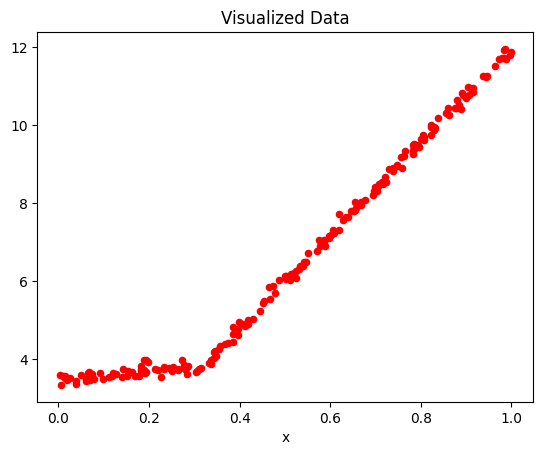

In [14]:
data4 = loadData('data/data4.txt')
plotData(data4)

### 代码



In [15]:
def linearSolve(dataMat):
    """将数据集格式化成目标变量Y和自变量X，执行简单的线性回归，得到ws
    Args:
        dataMat: 输入数据矩阵
    Returns:
        ws: 执行线性回归的回归系数 
        X : 格式化自变量X
        Y : 格式化目标变量Y
    """
    m, n = shape(dataMat)
    # 产生一个关于1的矩阵
    X = mat(ones((m, n)))
    Y = mat(ones((m, 1)))
    # X的0列为1，常数项，用于计算平衡误差
    X[:, 1: n] = dataMat[:, 0: n-1]
    Y = dataMat[:, -1]

    # 转置矩阵*矩阵
    xTx = X.T * X
    # 如果矩阵的逆不存在，会造成程序异常
    if linalg.det(xTx) == 0.0:
        raise NameError('矩阵不可逆')
    # 最小二乘法求最优解:  w0*1+w1*x1=y
    ws = xTx.I * (X.T * Y)
    return ws, X, Y

def modelLeaf(dataMat):
    """数据不再需要切分的时候，生成叶节点的模型。
    f(x) = x0 + x1 * featrue1+ x3 * featrue2 ...
    Args:
        dataMat: 输入数据集
    Returns:
        调用 linearSolve 函数，返回得到的 回归系数ws
    """
    ws, X, Y = linearSolve(dataMat)
    return ws

def modelErr(dataMat):
    """在给定数据集上计算误差。
    Args:
        dataMat: 输入数据矩阵
    Returns:
        调用 linearSolve 函数，返回 yHat 和 Y 之间的平方误差。
    """
    ws, X, Y = linearSolve(dataMat)
    yHat = X * ws
    return sum(power(Y - yHat, 2))

In [16]:
dataMat4 = mat(data4)
modelTree = createTree(dataMat4, modelLeaf, modelErr)
print(modelTree)


{'splitIndex': 0, 'splitValue': 0.285477, 'left': matrix([[1.69855694e-03],
        [1.19647739e+01]]), 'right': matrix([[3.46877936],
        [1.18521743]])}


可以看到，该代码以 0.285477 为界创建了两个模型。

## 五、树回归与标准回归的比较



### 项目概述

前面介绍了模型树、回归树和一般的回归方法，下面测试一下哪个模型最好。

这些模型将在某个数据上进行测试，该数据涉及人的智力水平和自行车的速度的关系。当然，数据是假的。

### 开发流程

1. 收集数据: 采用任意方法收集数据

2. 准备数据: 需要数值型数据，标称型数据应该映射成二值型数据

3. 分析数据: 绘出数据的二维可视化显示结果，以字典方式生成树

4. 训练算法: 模型树的构建

5. 测试算法: 使用测试数据上的R^2值来分析模型的效果

6. 使用算法: 使用训练出的树做预测，预测结果还可以用来做很多事情

### 准备数据

数据格式如下：
```
3.000000    46.852122
23.000000    178.676107
0.000000    86.154024
6.000000    68.707614
15.000000    139.737693
```

### 分析数据

数据可视化如下：


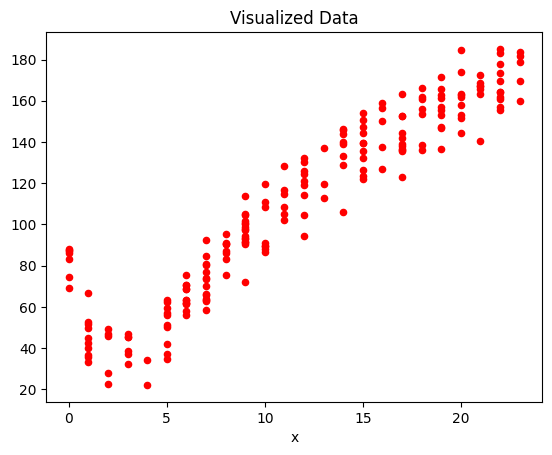

In [17]:
data5 = loadData('data/bikeSpeedVsIq_train.txt')
plotData(data5)

### 训练算法

In [18]:
def regTreeEval(model, inputData):
    """对回归树进行预测

    Args:
        model : 指定模型，可选值为回归树模型或模型树模型，这里为回归树
        inputData: 输入的测试数据

    Returns:
        float: 将输入的模型数据转换为浮点数返回
    """    
    return float(model)


def modelTreeEval(model, inputData):
    """对模型树进行预测

    Args:
        model : 指定模型，可选值为回归树模型或模型树模型，这里为模型树
        inputData: 输入的测试数据

    Returns:
        float: 将测试数据乘以回归系数得到一个预测值 ，转化为浮点数返回
    """    
    n = shape(inputData)[1]
    X = mat(ones((1, n+1)))
    X[:, 1:n+1] = inputData
    return float(X*model)


def treeForeCast(tree, inputDataa, modelEval=regTreeEval):
    """对特定模型的树进行预测，可以是回归树也可以是模型树

    Args:
        tree: 已经训练好的树的模型
        inputData: 输入的测试数据
        modelEval :  预测的树的模型类型. Defaults to regressionTreeEval.

    Returns:
        float: 预测值
    """        
    if not isTree(tree):
        return modelEval(tree, inputDataa)
    if inputDataa[tree['splitIndex']] > tree['splitValue']:
        if isTree(tree['left']):
            return treeForeCast(tree['left'], inputDataa, modelEval)
        else:
            return modelEval(tree['left'], inputDataa)
    else:
        if isTree(tree['right']):
            return treeForeCast(tree['right'], inputDataa, modelEval)
        else:
            return modelEval(tree['right'], inputDataa)


def createForeCast(tree, testData, modelEval=regTreeEval):
    """调用 treeForeCast ，对特定模型的树进行预测，可以是回归树也可以是模型树
    Args:
        tree: 已经训练好的树的模型
        inData: 输入的测试数据
        modelEval:预测的树的模型类型，可选值为 regTreeEval（回归树） 或 modelTreeEval（模型树），默认为回归树
    Returns:
        返回预测值矩阵
    """    
    m = len(testData)
    yHat = mat(zeros((m, 1)))
    for i in range(m):
        yHat[i, 0] = treeForeCast(tree, mat(testData[i]), modelEval)
    return yHat

In [23]:
trainMat = mat(loadData("data/bikeSpeedVsIq_train.txt"))
testMat = mat(loadData("data/bikeSpeedVsIq_test.txt"))
print("使用回归树，相关系数如下：")
myTree1 = createTree(trainMat, ops=(1, 20))
yHat1 = createForeCast(myTree1, testMat[:, 0])
# 返回 Pearson product-moment 相关系数。
print(corrcoef(yHat1, testMat[:, 1], rowvar=0)[0, 1])
print("使用模型树，相关系数如下：")
myTree2 = createTree(trainMat,leafType= modelLeaf, errType=modelErr, ops= (1, 20))
yHat2 = createForeCast(myTree2, testMat[:, 0],  modelTreeEval)
print(corrcoef(yHat2, testMat[:, 1], rowvar=0)[0, 1])
ws, X, Y = linearSolve(trainMat)
m = len(testMat[:, 0])
yHat3 = mat(zeros((m, 1)))
for i in range(shape(testMat)[0]):
    yHat3[i] = testMat[i, 0]*ws[1, 0] + ws[0, 0]
print("使用模型树，相关系数如下：")
print(corrcoef(yHat3, testMat[:, 1],rowvar=0)[0, 1])

使用回归树，相关系数如下：
0.9640852318222141
使用模型树，相关系数如下：
0.9760412191380593
使用模型树，相关系数如下：
0.9434684235674763


$R^2$判定系数就是拟合优度判定系数，它体现了回归模型中自变量的变异在因变量的变异中所占的比例。如 $R^2=0.99999$ 表示在因变量 y 的变异中有 99.999% 是由于变量 x 引起。当 $R^2=1$ 时表示，所有观测点都落在拟合的直线或曲线上；当 $R^2=0$ 时，表示自变量与因变量不存在直线或曲线关系。

由上述结果可知，这里的模型树的效果最好